<span style="font-size: 280%;color:#1155cc"> Parking Birmingham occupancy analysis 

<span style="font-size: 280%;color:#1155cc">- Model dla parkingu: 'BHMBCCMKT01' 
    
<span style="font-size: 150%;color:WHITE; background:BLACK">WERSJA PODSTAWOWA</span>     

<span style="font-size: 110%;color:#1155cc">Source of data: https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham
    
    

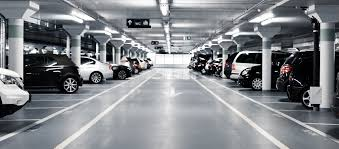

In [1]:
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from numpy import median

In [2]:
df = pd.read_csv('/home/wojciech/Pulpit/1/ParkingBirmingham.csv')

def green(text):
     print('\033[32m', text, '\033[0m', sep='') 

green(df.dtypes)
print()
print()
print(df.shape)

df.head(4)

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object


(35717, 4)


,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46


# Spis zmiennych:

- <span style="font-size: 130%;color:#1155cc"> SystemCodeNumber: </span>indeks rekordu
- <span style="font-size: 130%;color:#1155cc">LastUpdated:</span> data i godzina
- <span style="font-size: 130%;color:#1155cc">Capacity:</span> potencjalna ilość miejsc 
- <span style="font-size: 130%;color:#1155cc">Occupancy:</span> zajęta ilość miejsc


<span style="font-size: 110%;color:#1155cc"> Wycinanie zakresu do badań
    
<span style="font-size: 110%;color:red"> BEZ ZMIAN   

In [3]:
df2 = df.sample(frac = 1.00, random_state=148)
df2.shape

(35717, 4)

<span style="font-size: 110%;color:#1155cc"> Sprawdzam czy są braki w danych.
        
<span style="font-size: 110%;color:red"> BRAK DZIUR   

In [4]:
df.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64

In [5]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


<span style="font-size: 110%;color:#1155cc">Dane nie mają braków. Szukam czy nie ma błędów. Zmienne nie mają błędów.

In [6]:
df.agg(['min', 'max', 'mean', 'median'])

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
min,BHMBCCMKT01,220.00000,-8.000000,2016-10-04 07:46:28
max,Shopping,4675.00000,4327.000000,2016-12-19 16:30:35
mean,NaN,1397.55013,642.228911,NaN
median,NaN,849.00000,446.000000,NaN


<span style="font-size: 110%;color:#1155cc">Nie może być ujemna liczba zajętych miejsc, tworzymy zero gdy wartość jest ujemna
    

In [7]:
df['Occupancy'] = df['Occupancy'].apply(lambda x: 0 if x < 0 else x)

In [8]:
df.Occupancy.min()

0

<span style="font-size: 110%;color:#1155cc">Jak dużo jest analizowanych parkingów i ile mają miejsc?

In [9]:
df.pivot_table(index='SystemCodeNumber',  values='Capacity',aggfunc=['mean','max', 'min']).reset_index()

,SystemCodeNumber,mean,max,min
,,Capacity,Capacity,Capacity
0,BHMBCCMKT01,577,577,577
1,BHMBCCPST01,317,317,317
2,BHMBCCSNH01,863,863,863
3,BHMBCCTHL01,387,387,387
4,BHMBRCBRG01,1010,1010,1010
5,BHMBRCBRG02,1194,1194,1194
6,BHMBRCBRG03,849,849,849
7,BHMBRTARC01,496,496,496
8,BHMEURBRD01,470,470,470


In [10]:
df.SystemCodeNumber.value_counts()

Others-CCCPS8       1312
Others-CCCPS135a    1312
Others-CCCPS119a    1312
Others-CCCPS98      1312
BHMBCCTHL01         1312
Shopping            1312
Broad Street        1312
BHMBCCMKT01         1312
BHMEURBRD01         1312
BHMNCPHST01         1312
BHMNCPNST01         1312
BHMMBMMBX01         1312
Others-CCCPS105a    1312
Others-CCCPS202     1312
BHMBCCSNH01         1294
Others-CCCPS133     1294
BHMNCPLDH01         1292
BHMNCPPLS01         1291
BHMEURBRD02         1276
BHMBCCPST01         1276
NIA Car Parks       1204
NIA South           1204
BHMBRCBRG01         1186
BHMNCPRAN01         1186
Bull Ring           1186
BHMBRCBRG02         1186
BHMBRCBRG03         1186
BHMNCPNHS01         1038
NIA North            162
BHMBRTARC01           88
Name: SystemCodeNumber, dtype: int64

<span style="font-size: 180%;color:#1155cc"> Rozbieramy datę na szczegóły

<span style="font-size: 110%;color:#1155cc">Ze zmiennych opisujących mamy jedynie datę i godzinę więc wyciskamy z tej zmiennej ile tylko się da.

In [11]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

<span style="font-size: 110%;color:#1155cc">Przyjmujemy format daty.

In [12]:
df['LastUpdated'] = pd.to_datetime(df.LastUpdated)

In [13]:
df.dtypes

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
dtype: object

In [14]:
df.head(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42


In [15]:
df['year'] = df['LastUpdated'].dt.year
df['year'].unique()

array([2016])

In [16]:
df['hour'] = df['LastUpdated'].dt.hour
df['hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
df['month'] = df['LastUpdated'].dt.month
df['month'].unique()

array([10, 11, 12])

In [18]:
df['week'] = df['LastUpdated'].dt.week
df['week'].unique()

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [19]:
df['week_day'] = df['LastUpdated'].dt.weekday
df['week_day'].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [20]:
df['week_day_name'] = df['LastUpdated'].dt.weekday_name
df['week_day_name'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [21]:
df['day'] = df['LastUpdated'].dt.day
df['day'].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3, 20, 21])

In [22]:
Ewa = ['rano', 'południe','po południu','wieczór']

df['period'] = pd.qcut(df['hour'],4, labels=Ewa)

In [23]:
df['period'].unique()

[rano, południe, po południu, wieczór]
Categories (4, object): [rano < południe < po południu < wieczór]

In [24]:
pd.pivot_table(df, index= ['hour','period'], values= "Occupancy", aggfunc= 'count')

,,Occupancy
hour,period,
7,rano,834
8,rano,4018
9,rano,4037
10,rano,3829
11,południe,3981
12,południe,3855
13,po południu,4139
14,po południu,3945
15,wieczór,3942


In [25]:
df.head(4)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day,week_day_name,day,period
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016,7,10,40,1,Tuesday,4,rano
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016,8,10,40,1,Tuesday,4,rano
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016,8,10,40,1,Tuesday,4,rano
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016,9,10,40,1,Tuesday,4,rano


<span style="font-size: 110%;color:#1155cc"> Usuwamy: "week_day"
    bo to to samo co: "week_day_name"

In [26]:
del df['week_day']

<span style="font-size: 110%;color:#1155cc"> Wycinamy miesiące do nauki modelu i miesiące do sprawdzenia modelu.

In [27]:
df.month.value_counts()

11    15012
10    12474
12     8231
Name: month, dtype: int64

<span style="font-size: 180%;color:#1155cc"> Zmiana formatu zmiennych niezależnych</span> 

Które z tych funkcji są kategoryczne?

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 24 unikalnych wartości

In [28]:
a,b = df.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
year --- int64 --- 1
hour --- int64 --- 10
month --- int64 --- 3
week --- int64 --- 12
week_day_name --- object --- 7
period --- category --- 4


<span style="font-size: 110%;color:#1155cc">Sprawdzamy format danych 

In [29]:
green(df.dtypes)

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
year                         int64
hour                         int64
month                        int64
week                         int64
week_day_name               object
day                          int64
period                    category
dtype: object


<span style="font-size: 110%;color:#1155cc">Zmienne dyskretne mają format 'int64' a powinny mieć 'category'.

In [30]:
df.loc[:, 'year':'week_day_name'] =  df.loc[:, 'year':'week_day_name'].astype('category')

In [31]:
df.dtypes

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
year                      category
hour                      category
month                     category
week                      category
week_day_name             category
day                          int64
period                    category
dtype: object

<span style="font-size: 150%;color:WHITE; background:#1155Cc">WYDZIELENIE ZBIORU</span>

<span style="font-size: 170%;color:#1155cc">MIESIĄCE

<span style="font-size: 110%;color:#1155cc"> Przyjmujemy, że pierwsze dwa miesiące: 11,12 służą do nauki modelu a miesiąc 12 do sprawdzenia modelu

In [32]:
df6 = df[(df['month']==10)|(df['month']==11)]

In [33]:
df6.head(2)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016,7,10,40,Tuesday,4,rano
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016,8,10,40,Tuesday,4,rano


<span style="font-size: 110%;color:#1155cc"> Widać, że mamy kilkanascie parkingów, informacja o ilości potencjalnych miejsc parkingowych jest skorelowana z ilością zajentych miejsc musimy analizować każdy parking oddzielnie </span>

<span style="font-size: 170%;color:#1155cc">Wybieramy parking 'BHMBCCMKT01'

In [34]:
df6 = df6[df6['SystemCodeNumber']=='BHMBCCMKT01']

<span style="font-size: 110%;color:#1155cc"> Tworzę zdublowaną zmienną 'windspeed_shift' z uwzględnieniem przesunięcia 13 godzinnego.

<span style="font-size: 180%;color:#1155cc"> Przegląd wartości unikalnych dla zmiennych dyskretnych

In [35]:
a,b = df6.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df6.columns[i]
    h = df6[i].nunique()
    f = df6[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

int64 ---nunique-> 1 ---name-> Capacity
int64 ---nunique-> 328 ---name-> Occupancy
datetime64[ns] ---nunique-> 1003 ---name-> LastUpdated
category ---nunique-> 1 ---name-> year
category ---nunique-> 10 ---name-> hour
category ---nunique-> 2 ---name-> month
category ---nunique-> 9 ---name-> week
category ---nunique-> 7 ---name-> week_day_name
int64 ---nunique-> 31 ---name-> day
category ---nunique-> 4 ---name-> period


In [36]:
a,b = df6.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df6.columns[i]
    f = df6[i].dtypes
    h = df6[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
Capacity --- int64 --- 1
year --- category --- 1
hour --- category --- 10
month --- category --- 2
week --- category --- 9
week_day_name --- category --- 7
period --- category --- 4


<span style="font-size: 150%;color:WHITE; background:#1155Cc">DO KODOWANIE NA GORĄCO DAJEMY TE ZMIENNE, KTÓRE BĘDZIEMY MIELI W NASTĘPNYCH MIESIĄCACH </span>  

Nic nie zyskamy jak właczymy numer tygodnia: 'week' skoro w przyszłości będa inne numery miesiąca
Z czysto pragmatycznego podejścia wynika że 'year' też nic nie wnosi.

Do kodowania na gorąco bierzemy tylko te zmienne dyskretne, które możemy wykorzystać dla przyszłej prognozy. Nie bierzemy 'week' ponieważ pokrywa sie / koreluje się z dniem i miesiącem. wystarczy dzień tygodnia godzina i miesiąc. Takie praktyczne podejście.  




<span style="font-size: 150%;color:WHITE; background:#1155Cc">KODOWANIE NA GORĄCO</span>     


<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

In [37]:
discrete_var = ['hour', 'month', 'period', 'week_day_name']

In [38]:
df6.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated', 'year',
       'hour', 'month', 'week', 'week_day_name', 'day', 'period'],
      dtype='object')

In [39]:
df6.tail(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
1005,BHMBCCMKT01,577,132,2016-11-30 15:28:40,2016,15,11,48,Wednesday,30,wieczór
1006,BHMBCCMKT01,577,114,2016-11-30 16:01:39,2016,16,11,48,Wednesday,30,wieczór
1007,BHMBCCMKT01,577,106,2016-11-30 16:28:40,2016,16,11,48,Wednesday,30,wieczór


In [40]:
data_dummy = df6

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


discrete_var = ['hour', 'day', 'month', 'period', 'week_day_name']

for i in range(0,5):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [41]:
df6.head(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016,7,10,40,Tuesday,4,rano
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016,8,10,40,Tuesday,4,rano
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016,8,10,40,Tuesday,4,rano


In [42]:
df7 = data_dummy 
df7.sample(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,week,hour_8,hour_9,hour_10,hour_11,...,month_12,period_południe,period_po południu,period_wieczór,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
325,BHMBCCMKT01,577,55,2016-10-24 08:29:56,2016,43,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
828,BHMBCCMKT01,577,26,2016-11-21 08:04:26,2016,47,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
665,BHMBCCMKT01,577,124,2016-11-11 16:34:18,2016,45,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df7.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated', 'year',
       'week', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'month_11',
       'month_12', 'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday'],
      dtype='object')

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [44]:
df8 = df7[['Occupancy', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'month_11',
       'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday']]

In [45]:
df8.tail(3)

,Occupancy,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,month_11,period_południe,period_po południu,period_wieczór,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
1005,132,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1006,114,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1007,106,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


 <span style="font-size: 110%;color:#1155cc"> Podział zbioru na testowy i treningowy.

In [46]:
from sklearn.model_selection import train_test_split 

y = df8['Occupancy']
X = df8.drop('Occupancy', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state = 148)

<span style="font-size: 180%;color:#1155cc">Uruchamiam paczkę modeli regresji

<span style="font-size: 110%;color:#1155cc">Celem jest wybranie najlepszego modelu.

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


import warnings   
warnings.filterwarnings("ignore")

modele = [KNeighborsRegressor(),
          DecisionTreeRegressor(),
          BaggingRegressor(),
          GradientBoostingRegressor(),
          LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          ExtraTreesRegressor(),
          RandomForestRegressor(),
          SVR()
          ] 

nazwy = ['K-Neighbors Regressor',
          'Decision Tree Regressor',
          'Bagging Regressor',
          'Gradient Boosting Regressor',
          'Linear Regression',
          'AdaBoost Regressor',
          'Ridge',
          'Huber Regressor',
          'Elastic Net CV',
          'ExtraTreesRegressor',
          'Random Forest Regressor',
          'Support Vector Regression'
          ]

In [48]:
def model_val(t):
    
    global mean_dev,r2
    
    kfold = model_selection.KFold(n_splits=9, random_state=148)
    mean_dev = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
    mean_dev = np.round(mean_dev, decimals=1)
    r2 = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='r2')
    r2 = np.round(r2, decimals=2)
    
    return mean_dev,r2

In [49]:
def green(text):
     print('\033[32m', text, '\033[0m', sep='')
        
def red(text):
     print('\033[31m', text, '\033[0m', sep='')        


K-Neighbors Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.89 0.79 0.82 0.83 0.75 0.8  0.89 0.87 0.86]
Mean_dev:  [-25.7 -23.7 -30.5 -28.3 -28.9 -25.5 -27.  -24.8 -27.7]


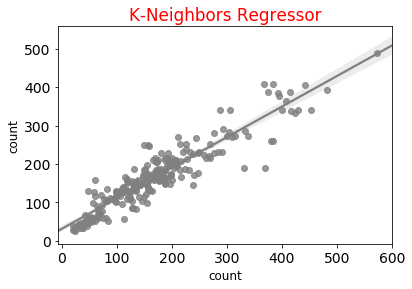

time: 1.0 seconds


Decision Tree Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.95 0.88 0.92 0.92 0.87 0.93 0.97 0.92 0.94]
Mean_dev:  [-20.1 -18.8 -21.  -19.9 -19.8 -16.9 -15.4 -18.6 -19.3]


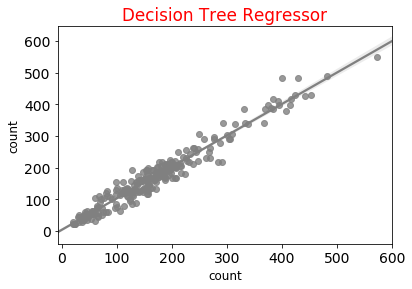

time: 1.0 seconds


Bagging Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.91 0.91 0.88 0.94 0.89 0.92 0.97 0.94 0.94]
Mean_dev:  [-20.2 -16.3 -21.6 -18.  -20.1 -17.5 -14.9 -18.7 -19. ]


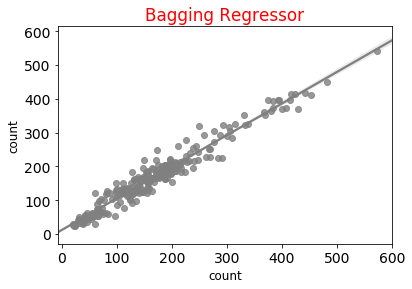

time: 1.0 seconds


Gradient Boosting Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.9  0.82 0.87 0.92 0.87 0.88 0.94 0.9  0.93]
Mean_dev:  [-24.4 -22.3 -26.9 -21.2 -21.7 -18.  -21.9 -22.1 -19.7]


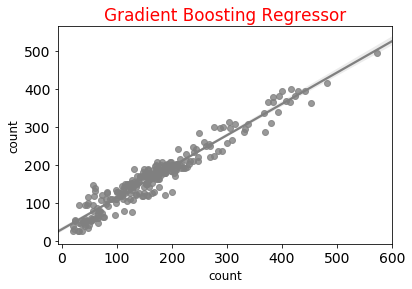

time: 3.0 seconds


Linear Regression
-------------------------------cross_val, KFold = 9 ------
R2:  [0.78 0.65 0.69 0.71 0.71 0.71 0.79 0.72 0.8 ]
Mean_dev:  [-39.2 -35.5 -43.3 -37.4 -34.4 -34.6 -38.6 -36.6 -35.4]


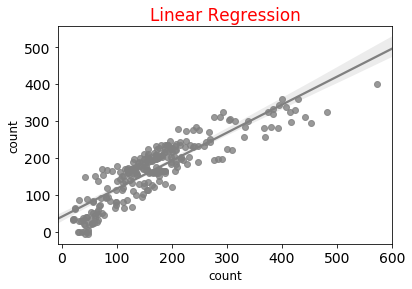

time: 1.0 seconds


AdaBoost Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.8  0.53 0.67 0.73 0.62 0.56 0.77 0.69 0.71]
Mean_dev:  [-41.8 -41.8 -52.5 -40.4 -49.  -46.9 -52.  -44.8 -44. ]


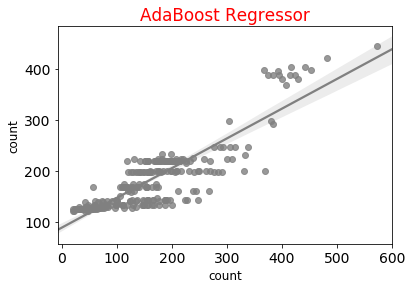

time: 3.0 seconds


Ridge
-------------------------------cross_val, KFold = 9 ------
R2:  [0.77 0.64 0.69 0.73 0.75 0.74 0.77 0.72 0.8 ]
Mean_dev:  [-39.8 -34.7 -42.  -37.2 -32.1 -33.3 -38.5 -36.4 -33.8]


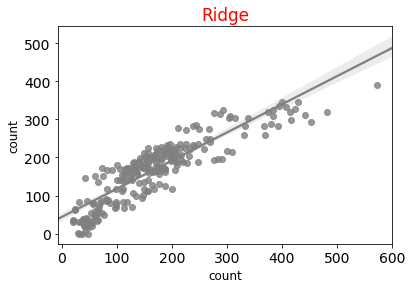

time: 1.0 seconds


Huber Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.73 0.68 0.67 0.72 0.78 0.73 0.71 0.68 0.79]
Mean_dev:  [-39.6 -31.2 -40.6 -34.7 -28.4 -30.8 -38.  -35.6 -30.2]


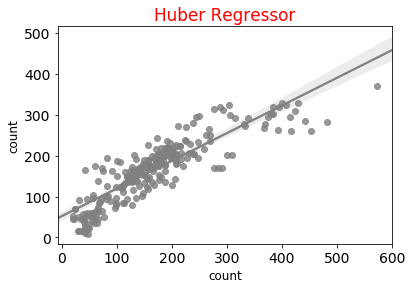

time: 1.0 seconds


Elastic Net CV
-------------------------------cross_val, KFold = 9 ------
R2:  [0.74 0.66 0.66 0.74 0.73 0.72 0.72 0.71 0.79]
Mean_dev:  [-40.8 -33.8 -43.6 -37.6 -32.8 -33.  -40.6 -35.2 -32.7]


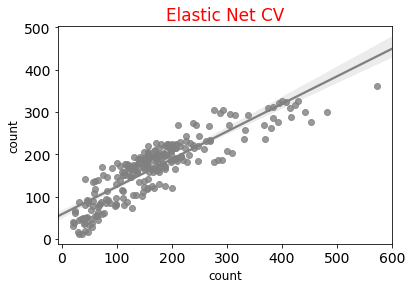

time: 2.0 seconds


ExtraTreesRegressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.94 0.88 0.93 0.92 0.89 0.93 0.97 0.93 0.93]
Mean_dev:  [-19.8 -17.9 -21.2 -19.4 -20.  -16.5 -15.7 -18.8 -18.9]


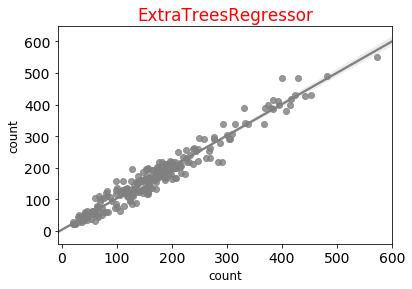

time: 8.0 seconds


Random Forest Regressor
-------------------------------cross_val, KFold = 9 ------
R2:  [0.93 0.92 0.93 0.95 0.89 0.92 0.97 0.94 0.94]
Mean_dev:  [-20.2 -15.7 -20.1 -16.2 -19.  -16.6 -15.7 -18.1 -18.2]


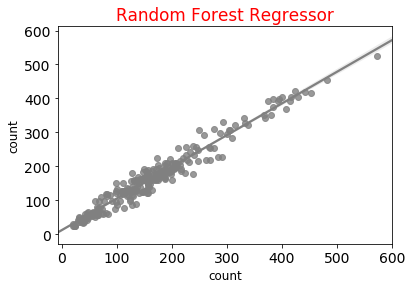

time: 8.0 seconds


Support Vector Regression
-------------------------------cross_val, KFold = 9 ------
R2:  [0.11 0.19 0.13 0.16 0.2  0.2  0.12 0.16 0.15]
Mean_dev:  [-73.9 -48.6 -75.4 -57.8 -57.9 -55.4 -79.2 -60.8 -66.8]


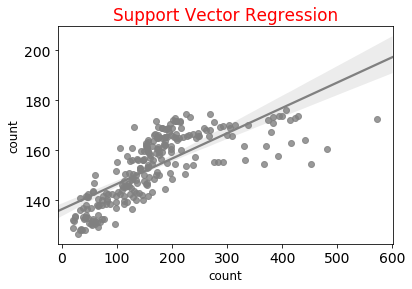

time: 2.0 seconds



In [90]:
for n,p in zip(nazwy,modele):      
    
    import matplotlib.pyplot as plt
    import time   
    
    start_time = time.time()
    
    results = model_val(p)
    print()
    red(n)
    print("-------------------------------cross_val, KFold = 9 ------")
    print('R2: ', r2)
    print('Mean_dev: ', mean_dev)
    
    # wykres
    
    plt.rc("font",size=14)
    clf = p
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)

    ax = sns.regplot(ytest,ypred,color='grey')
    plt.title(n,color='r') 
    plt.ylabel('count', fontsize=12) 
    plt.xlabel('count', fontsize=12) 
    plt.show()
    
    # pomiar czasu
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)    
    print()

<span style="font-size: 180%;color:#1155cc">Tuning modeli 
    
<span style="font-size: 110%;color:#1155cc">Analiza cross validation bez szczególnych ustawień hiperparametrów, na pełnym zestawie zmiennych niezależnych pokazała, że istnieją trzy najlepsze modele regresji:

        - Bagging Regressor
        
<span style="font-size: 110%;color:#1155cc">Teraz należy udoskonalić te modele poprzez dobór hiperparametrów. 

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Bagging Regressor'

BaggingRegressor: 0.9197520583906578
{'base_estimator': DecisionTreeRegressor(), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0}
BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False)


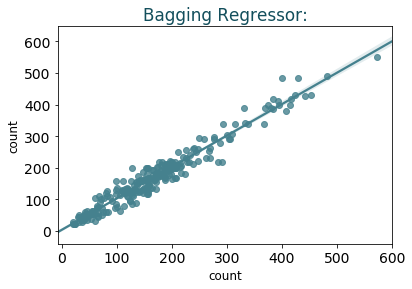

time: 24.0 seconds


In [51]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
import time   
    
start_time = time.time()

# DummyRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(gamma='scale')

parameters={"base_estimator": [DecisionTreeRegressor(),KNeighborsRegressor()],
                          "max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]}

Bagging_Regressor = GridSearchCV(BaggingRegressor(), parameters,scoring = 'r2')
Bagging_Regressor.fit(Xtrain,ytrain)

print('BaggingRegressor:',Bagging_Regressor.best_score_)
print(Bagging_Regressor.best_params_)
print(Bagging_Regressor.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
Bagging_Regressor.fit(Xtrain,ytrain)
ypred = Bagging_Regressor.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Bagging Regressor:',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()


# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n)    

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Random Forest Regressor'

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Extra Trees Regressor'

Extra Trees Regressor: 0.9216394728458435
{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
ExtraTreesRegressor(min_samples_split=10, n_estimators=500)


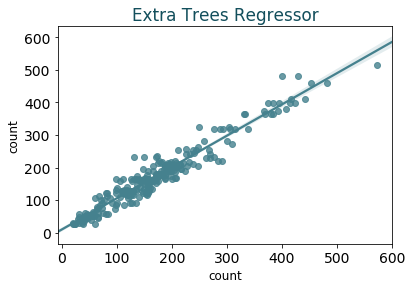

time: 187.0 seconds


In [52]:
parameters={'n_estimators': [50,100,500],
               'min_samples_leaf': [1,5,10],
                'min_samples_split': [5,10,20]}

ExtraTreesRegressor = GridSearchCV(ExtraTreesRegressor(), parameters,scoring = 'r2')
ExtraTreesRegressor.fit(Xtrain,ytrain)

print('Extra Trees Regressor:',ExtraTreesRegressor.best_score_)
print(ExtraTreesRegressor.best_params_)
print(ExtraTreesRegressor.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
ExtraTreesRegressor.fit(Xtrain,ytrain)
ypred = ExtraTreesRegressor.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Extra Trees Regressor',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()

# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n) 

 <span style="font-size: 150%;color:white;background:#674ea7"> SPRAWDZENIE JAK PROGNOZUJE MODEL
    
<span style="font-size: 110%;color:#1155cc">uruchamiamy teraz tą część Która miała służyć do sprawdzenia modelu: miesiąc 12    

<span style="font-size: 110%;color:#1155cc"> PRZYGOTOWANIE DANYCH DO UŻYCIA MODELI
    
<span style="font-size: 160%;color:#1155cc"> Miesiąc: 12    

In [72]:
df9 = df[df['month']==12]
print(df9.shape)
df9.tail(3)

(8231, 11)


,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
35714,Shopping,1920,1432,2016-12-19 15:29:33,2016,15,12,51,Monday,19,wieczór
35715,Shopping,1920,1321,2016-12-19 16:03:35,2016,16,12,51,Monday,19,wieczór
35716,Shopping,1920,1180,2016-12-19 16:30:35,2016,16,12,51,Monday,19,wieczór


<span style="font-size: 160%;color:#1155cc"> Parking: 'BHMBCCMKT01' 

In [73]:
df9 = df9[df9['SystemCodeNumber']=='BHMBCCMKT01']

In [74]:
df9=df9[df9['month']==12]
print(df9.shape)
df9.head(3)

(304, 11)


,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
1008,BHMBCCMKT01,577,22,2016-12-01 08:05:40,2016,8,12,48,Thursday,1,rano
1009,BHMBCCMKT01,577,22,2016-12-01 08:25:46,2016,8,12,48,Thursday,1,rano
1010,BHMBCCMKT01,577,31,2016-12-01 08:58:41,2016,8,12,48,Thursday,1,rano


<span style="font-size: 150%;color:WHITE; background:#1155Cc">KODOWANIE NA GORĄCO</span>     

<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

In [75]:
discrete_var = ['hour', 'month', 'period', 'week_day_name']

In [76]:
df9.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated', 'year',
       'hour', 'month', 'week', 'week_day_name', 'day', 'period'],
      dtype='object')

In [77]:
print(df9.shape)
df9.tail(3)

(304, 11)


,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
1309,BHMBCCMKT01,577,274,2016-12-19 15:29:33,2016,15,12,51,Monday,19,wieczór
1310,BHMBCCMKT01,577,230,2016-12-19 16:03:35,2016,16,12,51,Monday,19,wieczór
1311,BHMBCCMKT01,577,193,2016-12-19 16:30:35,2016,16,12,51,Monday,19,wieczór


In [78]:
data_dummy = df9

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


discrete_var = ['hour', 'day', 'month', 'period', 'week_day_name']

for i in range(0,5):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [79]:
df9.head(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,hour,month,week,week_day_name,day,period
1008,BHMBCCMKT01,577,22,2016-12-01 08:05:40,2016,8,12,48,Thursday,1,rano
1009,BHMBCCMKT01,577,22,2016-12-01 08:25:46,2016,8,12,48,Thursday,1,rano
1010,BHMBCCMKT01,577,31,2016-12-01 08:58:41,2016,8,12,48,Thursday,1,rano


In [80]:
df10 = data_dummy 
df10.sample(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,year,week,hour_8,hour_9,hour_10,hour_11,...,month_12,period_południe,period_po południu,period_wieczór,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
1144,BHMBCCMKT01,577,383,2016-12-10 12:55:40,2016,49,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1166,BHMBCCMKT01,577,325,2016-12-11 14:59:43,2016,49,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1182,BHMBCCMKT01,577,184,2016-12-12 14:02:50,2016,50,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [81]:
df10.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated', 'year',
       'week', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'month_11',
       'month_12', 'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday'],
      dtype='object')

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [82]:
df11 = df10[['Occupancy', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'month_11',
       'month_12', 'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday']]

In [83]:
print(df11.shape)
df11.tail(3)

(304, 37)


,Occupancy,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,month_12,period_południe,period_po południu,period_wieczór,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
1309,274,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
1310,230,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
1311,193,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0


<span style="font-size: 110%;color:#1155cc">Dzielimy zbiór zmienne niezależne i zmieną zależną.

In [84]:
y = df11['Occupancy']
X = df11.drop('Occupancy', axis=1)

<span style="font-size: 110%;color:#1155cc">Sprawdzam jak sobie poradzą 3 wybrane modele.

<span style="font-size: 160%;color:#1155cc">Bagging_Regressor
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany    

In [85]:
Bagging_Regressor = Bagging_Regressor.fit(X,y)
df11['Bagging_Reg'] = Bagging_Regressor.predict(X)

y_pred = Bagging_Regressor.predict(X)
print('Bagging_Reg r2:      %.2f' % r2_score(y, y_pred))

Bagging_Reg r2:      0.98


<span style="font-size: 160%;color:#1155cc">Extra Trees Regressor
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany        

In [86]:
ExtraTreesRegressor = ExtraTreesRegressor.fit(X,y)
df11['ExtraTrees_Reg'] = ExtraTreesRegressor.predict(X)
df11['ExtraTrees_Reg'] = np.round(df11['ExtraTrees_Reg'], decimals=1)
y_pred = ExtraTreesRegressor.predict(X)
print('ExtraTrees_Reg r2:   %.2f' % r2_score(y, y_pred))

ExtraTrees_Reg r2:   0.96


<span style="font-size: 150%;color:#1155cc">Tworzę komitet modeli w proporcji:
     
<div class="alert-info">

     60% ExtraTrees_Reg
     20% Bagging_Reg
     20% RandomForest_Reg
</div>

In [87]:
df11['KM'] = (0.6*df11['Bagging_Reg'])+(0.4*df11['ExtraTrees_Reg'])

<span style="font-size: 110%;color:#1155cc"> Dodajemy zmienną 'dteday'

In [88]:
df11['LastUpdated'] = df9['LastUpdated']

df11[['LastUpdated','Bagging_Reg','ExtraTrees_Reg','Occupancy']].sample(10)

,LastUpdated,Bagging_Reg,ExtraTrees_Reg,Occupancy
1187,2016-12-12 16:29:51,98.600000,100.9,95
1072,2016-12-06 12:56:16,233.753333,239.0,238
1307,2016-12-19 14:30:33,301.400000,295.5,309
1090,2016-12-07 12:59:22,177.060000,174.2,178
1054,2016-12-05 13:02:08,174.950000,184.6,172
1241,2016-12-16 08:30:12,18.325000,17.0,19
1123,2016-12-09 11:29:33,199.000000,190.0,190
1133,2016-12-09 16:29:30,141.700000,146.5,136
1219,2016-12-14 15:30:00,139.463333,141.1,142
1184,2016-12-12 14:55:51,168.201667,168.6,159


<span style="font-size: 150%;color:#1155cc">Graficzny przebieg procesu

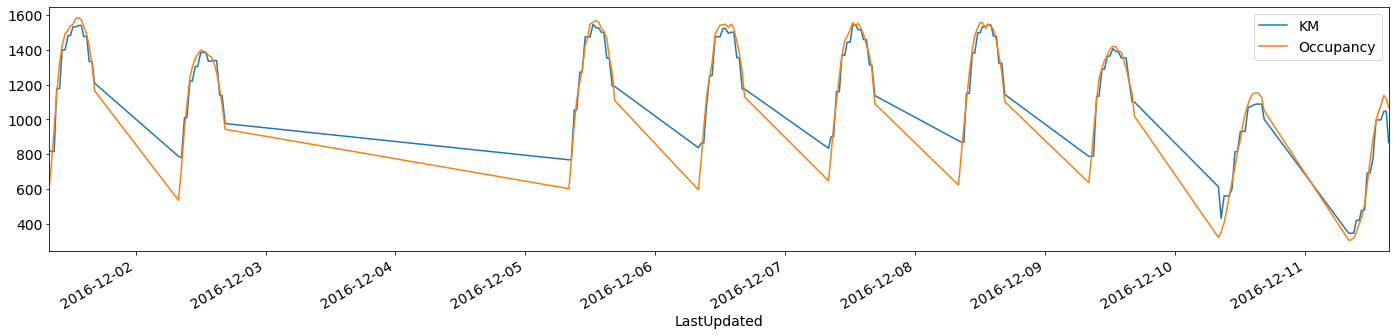

In [70]:
df11.reset_index
df11.set_index('LastUpdated', inplace=True)
df11[['KM','Occupancy']].head(160).plot(figsize=(24,5))

<span style="font-size: 180%;color:#1155cc">Wizualizacja struktury

<span style="font-size: 110%;color:#1155cc"> DANE DYSKRETNE - WYŚWIETLAM ILOŚĆ DANYCH UNIKALNYCH W KAŻDEJ KATEGORII

In [71]:
dkk = dk[['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
categorical_vars=['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

NameError: name 'dk' is not defined

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych
for i, ax in enumerate(axes.ravel()):
    if i > 8:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=dkk, ax=ax)

<span style="font-size: 180%;color:#1155cc"> DANE CIĄGŁE

In [ ]:
sns.set(style="white")
_ = dk.hist(column=['windspeed' ,'hum','temp','cnt'], figsize = (8,8))

In [ ]:
def N_plots(df,x1,x2,by,title, x_title):

    plt.figure(dpi= 380)

    fig, axes = joypy.joyplot(df, column=[x1, x2], by=by, ylim='own', figsize=(12,8), legend=True, color=['#f4cccc', '#0c343d'], alpha=0.4)
    # color=['#76a5af', '#134f5c']
    # color=['#f4cccc', '#0c343d']
    # color=['#a4c2f4', '#1c4587']
    #color=['#e06666', '#d9d9d9']
    #color=['#e06666', '#434343']
    #color=['#b6d7a8','#6aa84f']
    
    # Decoration
    plt.title(title, fontsize=22, color='#d0e0e3', alpha=0.9)
    plt.rc("font", size=20)
    plt.xlabel(x_title,  fontsize=16, color='darkred', alpha=1)
    #plt.ylabel('Data Scientist', fontsize=26,  color='grey', alpha=0.8)

    plt.show

<span style="font-size: 180%;color:#1155cc">Ilość rowerów zależnie od temperatury i wilgotności w miesiącach

In [ ]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt

df=df
x1='temp'
x2='hum'
by='mnth'
title = 'Ilość rowerów zależnie od temperatury i wilgotności w miesiącach'
x_title = 'Temperatura i wilgotność'

N_plots(df,x1,x2,by,title, x_title)

<span style="font-size: 180%;color:#1155cc">Częstotliwość wypożyczania rowerów w roku 2011

In [ ]:
import matplotlib as mpl
import calmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/home/wojciech/Pulpit/11/hour.csv', parse_dates=['dteday'])
df.set_index('dteday', inplace=True)

In [ ]:
plt.figure(figsize=(16,10), dpi= 280)
calmap.calendarplot(df['2011']['cnt'],cmap= 'YlOrBr', fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':24}, subplot_kws={'title':'Częstotliwość wypożyczania rowerów w roku 2011'})
plt.show()

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów w godzinach zależnie od sezonu

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.pointplot(data=df[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Wypożyczanie rowerów w godzinach zależnie od sezonu")

In [ ]:
df.columns

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od miesiąca

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.barplot(data=df[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Miesięczny poziom wypożyczeń")

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od godzin

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.boxplot(data=df[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

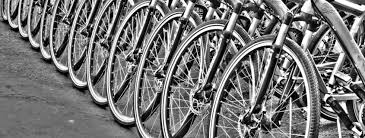 